In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from scipy import stats

In [91]:
df = pd.read_csv('BloodTrain.csv')

In [92]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [93]:
df.shape

(576, 6)

In [94]:
df = df.dropna()

In [95]:
df = df.rename(columns={'Unnamed: 0': 'NAME', 'Months since Last Donation': 'MSLD', 'Number of Donations': 'NOD', 'Total Volume Donated (c.c.)': 'TVD', 'Months since First Donation':
                       'MSFD', 'Made Donation in March 2007': 'MDIM2007'})

In [96]:
df.head()

,NAME,MSLD,NOD,TVD,MSFD,MDIM2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [97]:
corr = df[['MSLD', 'NOD', 'TVD', 'MSFD']].corr()

In [98]:
print(corr)

          MSLD       NOD       TVD      MSFD
MSLD  1.000000 -0.159731 -0.159731  0.186899
NOD  -0.159731  1.000000  1.000000  0.622116
TVD  -0.159731  1.000000  1.000000  0.622116
MSFD  0.186899  0.622116  0.622116  1.000000


In [99]:
#who ever takes the blood takes the same exact amount from every person every time

In [100]:
df.TVD[4]/df.NOD[4]

250.0

In [101]:
#250 c.c. per donation

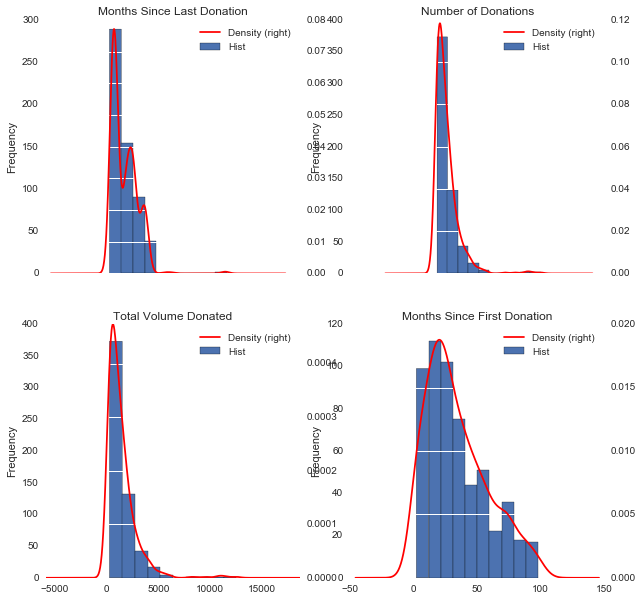

In [102]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

plt.subplot(221)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.MSLD.plot(kind = 'density', secondary_y = True, label = 'Density', legend = True, c = 'red')
df.MSLD.plot(kind = 'hist', label = 'Hist', legend = True, bins = 10)
plt.title('Months Since Last Donation')

plt.subplot(222)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.NOD.plot(kind = 'density', secondary_y = True, label = 'Density', legend = True, c = 'red')
df.NOD.plot(kind = 'hist', label = 'Hist', legend = True, bins = 10)
plt.title('Number of Donations')

plt.subplot(223)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.TVD.plot(kind = 'density', secondary_y = True, label = 'Density', legend = True, c = 'red')
df.TVD.plot(kind = 'hist', label = 'Hist', legend = True, bins = 10)
plt.title('Total Volume Donated')
plt.axis('tight')

plt.subplot(224)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.MSFD.plot(kind = 'density', secondary_y = True, label = 'Density', legend = True, c = 'red')
df.MSFD.plot(kind = 'hist', label = 'Hist', legend = True, bins = 10)
plt.title('Months Since First Donation')

#squeeze in the x axis on the charts? perhaps it's do to the overlay

In [103]:
df = df.drop('TVD', 1)

In [104]:
df.head()

,NAME,MSLD,NOD,MSFD,MDIM2007
0,619,2,50,98,1
1,664,0,13,28,1
2,441,1,16,35,1
3,160,2,20,45,1
4,358,1,24,77,0


In [105]:
corr2 = df[['MSLD', 'NOD', 'MSFD']].corr()

In [106]:
print(corr2)

          MSLD       NOD      MSFD
MSLD  1.000000 -0.159731  0.186899
NOD  -0.159731  1.000000  0.622116
MSFD  0.186899  0.622116  1.000000


In [107]:
MSLD = df['MSLD'].copy()
NOD = df['NOD'].copy()
MSFD = df['MSFD'].copy()

In [108]:
df.head()

,NAME,MSLD,NOD,MSFD,MDIM2007
0,619,2,50,98,1
1,664,0,13,28,1
2,441,1,16,35,1
3,160,2,20,45,1
4,358,1,24,77,0


In [109]:
MSLD.head()

0    2
1    0
2    1
3    2
4    1
Name: MSLD, dtype: int64

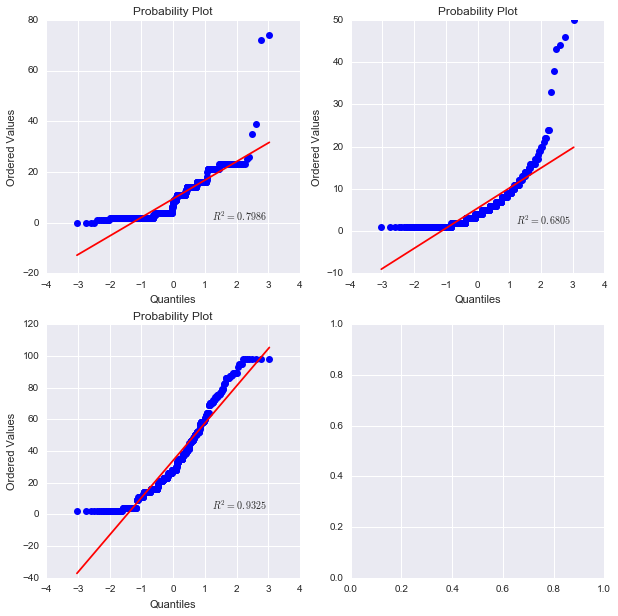

In [110]:
np.random.seed(7)

fig, ax = plt.subplots(2,2, figsize = (10,10))

plt.subplot(221)
ax = plt.gca()
stats.probplot(MSLD, dist="norm", plot=plt)

plt.subplot(222)
ax = plt.gca()
stats.probplot(NOD, dist="norm", plot=plt)

plt.subplot(223)
ax = plt.gca()
stats.probplot(MSFD, dist="norm", plot=plt)

plt.show()

In [111]:
df.describe()

,NAME,MSLD,NOD,MSFD,MDIM2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,34.050347,0.239583
std,216.947773,8.175454,5.740010,24.227672,0.427200
min,0.000000,0.000000,1.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,98.000000,1.000000


In [114]:
dfNoOut = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [115]:
dfNoOut.describe()

,NAME,MSLD,NOD,MSFD,MDIM2007
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,373.640071,9.161348,4.996454,33.062057,0.237589
std,216.593651,7.090674,4.157638,23.355954,0.425984
min,0.000000,0.000000,1.000000,2.000000,0.000000
25%,184.750000,2.000000,2.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,28.000000,0.000000
75%,561.250000,14.000000,7.000000,47.000000,0.000000
max,747.000000,26.000000,22.000000,98.000000,1.000000


In [135]:
MSLD2 = dfNoOut['MSLD'].copy()
NOD2 = dfNoOut['NOD'].copy()
MSFD2 = dfNoOut['MSFD'].copy()

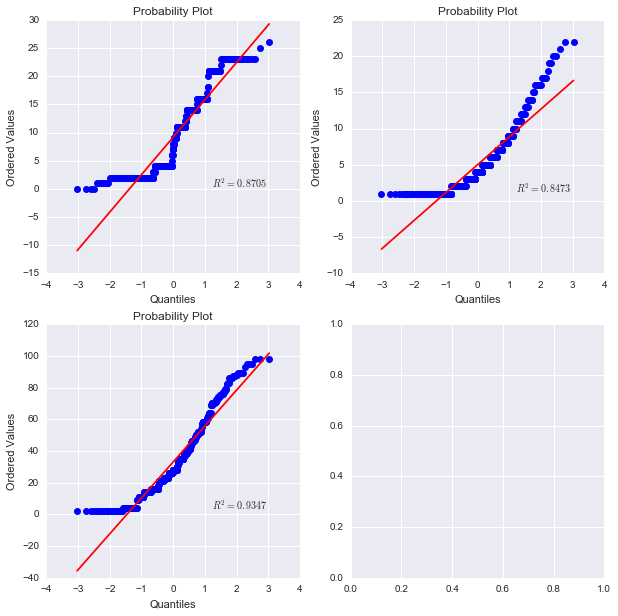

In [125]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

plt.subplot(221)
ax = plt.gca()
stats.probplot(MSLD2, dist="norm", plot=plt)

plt.subplot(222)
ax = plt.gca()
stats.probplot(NOD2, dist="norm", plot=plt)

plt.subplot(223)
ax = plt.gca()
stats.probplot(MSFD2, dist="norm", plot=plt)

plt.show()

In [127]:
df_norm_noout = (dfNoOut - dfNoOut.mean())/(dfNoOut.max() - dfNoOut.min())

In [128]:
df_norm_noout.mean()

NAME        2.209004e-17
MSLD        9.665239e-17
NOD        -6.397562e-18
MSFD       -1.943875e-17
MDIM2007   -1.652539e-16
dtype: float64

In [144]:
print(dfNoOut.describe())
print(df_norm_noout.describe())

             NAME        MSLD         NOD        MSFD    MDIM2007
count  564.000000  564.000000  564.000000  564.000000  564.000000
mean   373.640071    9.161348    4.996454   33.062057    0.237589
std    216.593651    7.090674    4.157638   23.355954    0.425984
min      0.000000    0.000000    1.000000    2.000000    0.000000
25%    184.750000    2.000000    2.000000   16.000000    0.000000
50%    375.500000    7.000000    4.000000   28.000000    0.000000
75%    561.250000   14.000000    7.000000   47.000000    0.000000
max    747.000000   26.000000   22.000000   98.000000    1.000000
               NAME          MSLD           NOD          MSFD      MDIM2007
count  5.640000e+02  5.640000e+02  5.640000e+02  5.640000e+02  5.640000e+02
mean   2.209004e-17  9.665239e-17 -6.397562e-18 -1.943875e-17 -1.652539e-16
std    2.899513e-01  2.727182e-01  1.979828e-01  2.432912e-01  4.259836e-01
min   -5.001875e-01 -3.523595e-01 -1.903073e-01 -3.235631e-01 -2.375887e-01
25%   -2.528649e-01 -2.754

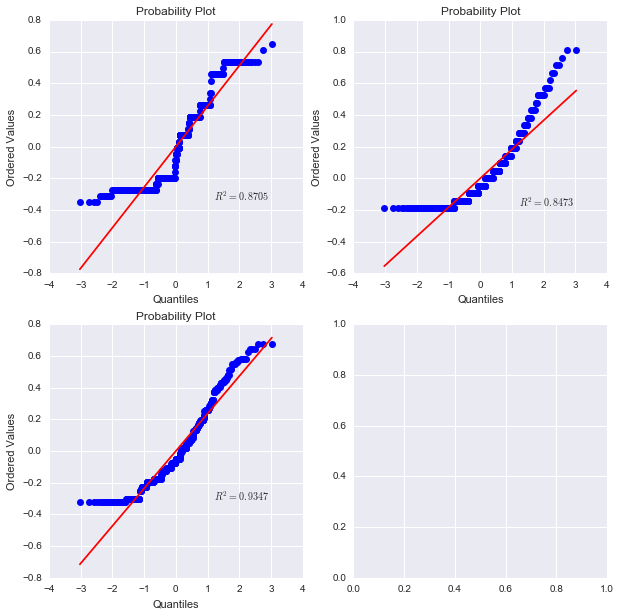

In [130]:
MSLD3 = df_norm_noout['MSLD'].copy()
NOD3 = df_norm_noout['NOD'].copy()
MSFD3 = df_norm_noout['MSFD'].copy()

fig, ax = plt.subplots(2,2, figsize = (10,10))

plt.subplot(221)
ax = plt.gca()
stats.probplot(MSLD3, dist="norm", plot=plt)

plt.subplot(222)
ax = plt.gca()
stats.probplot(NOD3, dist="norm", plot=plt)

plt.subplot(223)
ax = plt.gca()
stats.probplot(MSFD3, dist="norm", plot=plt)

plt.show()

#normalization is probably wrong, but why are the QQ plots exactly the same?

In [131]:
clf = linear_model.LinearRegression()

In [164]:
X = dfNoOut['MSLD'].values
y = dfNoOut.MDIM2007

1      1
2      1
3      1
5      0
6      1
7      0
9      0
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     1
21     1
22     0
23     0
24     0
25     0
26     1
27     1
28     0
29     1
30     1
31     1
32     1
      ..
544    0
545    0
546    0
547    0
548    0
549    0
550    1
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    0
563    0
564    0
565    0
566    1
567    0
568    0
569    0
570    0
571    0
572    0
573    0
Name: MDIM2007, dtype: int64

In [163]:
clf.fit(X,y)
y_hat = clf.predict(X)
residual = y - y_hat

fig,[ax1,ax2, ax3] = plt.subplots(1,3,figsize=(18,6))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [  1 564]

In [160]:
# True outcomes in blue
ax1.plot(X, y,'.', c='b', label='truth')
# Predicted values in red
ax1.plot(X, y_hat,'+', c='r', label='prediction')
ax1.set_title("Prediction vs Truth")
ax1.legend(loc='best')

# Residuals
ax2.plot(X,residual,'.', c='b', label='Residuals')
ax2.set_title("Residuals")
ax2.legend(loc='best')

# QQ plot
(a, r) = stats.probplot(residue, dist="norm", plot=ax3)

ValueError: all the input array dimensions except for the concatenation axis must match exactly